#### Antibiotic Drug Discovery
#### Corey J Sinnott
# Drug Import and Featurization II

## Executive Summary

This report was commissioned to determine a robust, fast, and reproducible means of searching for, and developing, new antibiotics, in an effort to combat antibiotic resistance. After in-depth analysis, conclusions and recommendations will be presented.
   
Data was obtained from the following source:
- Comprehensive Antibiotic Resistance Database via CARD CLI interface: 
 - https://card.mcmaster.ca
- ChEMBL via Python client library: 
 - https://www.ebi.ac.uk/chembl/ 

**Full Executive Summary, Conclusion, Recommendations, Data Dictionary and Sources can be found in README.**

## Contents:
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [SMILES Vectorization](#SMILES-Vectorization)

#### Import Libraries

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
#cmd line wrapper for PaDEL
from padelpy import from_smiles
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Data Import

In [3]:
df = pd.read_csv('./data/acinetobacter_baumannii_MIC_addFeats.csv').drop(columns = 'Unnamed: 0')

In [15]:
df.sample(3)

,canonical_smiles,standard_value,bioactivity_binary,bioactivity_binary_class,bioactivity_multiclass,mol_wt,log_p,proton_donors,proton_acceptors
7406,CC(=O)/C(=C/c1cn(CC(=O)N2CCN(Cc3ccc(F)cc3)CC2)...,512.0,inactive,0,inactive,579.032,4.77842,0.0,8.0
6609,O=[N+]([O-])c1oc2ccc3ccccc3c2c1CCO,10000.0,inactive,0,inactive,257.245,3.02900,1.0,4.0
8111,CCN(CC)C1CCCCc2ccc(OC)c(c2)Oc2cc(ccc2OC)CC1,100.0,inactive,0,intermediate,397.559,5.86550,0.0,4.0


In [17]:
len(df.canonical_smiles[5796])

33

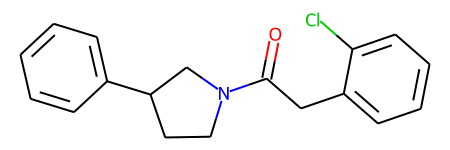

In [6]:
Chem.MolFromSmiles(df.canonical_smiles[5796])

# SMILES Vectorization

PadelPy Test

In [16]:
#test - runs software externally then inputs
from_smiles(smiles = df.canonical_smiles[5796], fingerprints = True, descriptors = False)

{'PubchemFP0': '1',
 'PubchemFP1': '1',
 'PubchemFP2': '1',
 'PubchemFP3': '0',
 'PubchemFP4': '0',
 'PubchemFP5': '0',
 'PubchemFP6': '0',
 'PubchemFP7': '0',
 'PubchemFP8': '0',
 'PubchemFP9': '1',
 'PubchemFP10': '1',
 'PubchemFP11': '1',
 'PubchemFP12': '1',
 'PubchemFP13': '0',
 'PubchemFP14': '1',
 'PubchemFP15': '0',
 'PubchemFP16': '0',
 'PubchemFP17': '0',
 'PubchemFP18': '1',
 'PubchemFP19': '0',
 'PubchemFP20': '0',
 'PubchemFP21': '0',
 'PubchemFP22': '0',
 'PubchemFP23': '0',
 'PubchemFP24': '0',
 'PubchemFP25': '0',
 'PubchemFP26': '0',
 'PubchemFP27': '0',
 'PubchemFP28': '0',
 'PubchemFP29': '0',
 'PubchemFP30': '0',
 'PubchemFP31': '0',
 'PubchemFP32': '0',
 'PubchemFP33': '0',
 'PubchemFP34': '0',
 'PubchemFP35': '0',
 'PubchemFP36': '0',
 'PubchemFP37': '1',
 'PubchemFP38': '0',
 'PubchemFP39': '0',
 'PubchemFP40': '0',
 'PubchemFP41': '0',
 'PubchemFP42': '0',
 'PubchemFP43': '0',
 'PubchemFP44': '0',
 'PubchemFP45': '0',
 'PubchemFP46': '0',
 'PubchemFP47': '0',
 '

In [23]:
len([i for i in df.canonical_smiles if len(i) < 30])

327

In [19]:
#proof of concept using subset of small molecules

# %%time
# fingerprint_test = [(from_smiles(smiles = i, fingerprints = True, 
#                      descriptors = False)) for i in df.canonical_smiles if len(i) < 30]

#opens and closes software for each row!
#df would take ~12hrs
#need faster option

In [21]:

fingerprint_test[0]

{'PubchemFP0': '1',
 'PubchemFP1': '0',
 'PubchemFP2': '0',
 'PubchemFP3': '0',
 'PubchemFP4': '0',
 'PubchemFP5': '0',
 'PubchemFP6': '0',
 'PubchemFP7': '0',
 'PubchemFP8': '0',
 'PubchemFP9': '1',
 'PubchemFP10': '1',
 'PubchemFP11': '0',
 'PubchemFP12': '0',
 'PubchemFP13': '0',
 'PubchemFP14': '1',
 'PubchemFP15': '1',
 'PubchemFP16': '0',
 'PubchemFP17': '0',
 'PubchemFP18': '0',
 'PubchemFP19': '0',
 'PubchemFP20': '0',
 'PubchemFP21': '0',
 'PubchemFP22': '0',
 'PubchemFP23': '0',
 'PubchemFP24': '0',
 'PubchemFP25': '0',
 'PubchemFP26': '0',
 'PubchemFP27': '0',
 'PubchemFP28': '0',
 'PubchemFP29': '0',
 'PubchemFP30': '0',
 'PubchemFP31': '0',
 'PubchemFP32': '0',
 'PubchemFP33': '1',
 'PubchemFP34': '0',
 'PubchemFP35': '0',
 'PubchemFP36': '0',
 'PubchemFP37': '0',
 'PubchemFP38': '0',
 'PubchemFP39': '0',
 'PubchemFP40': '0',
 'PubchemFP41': '0',
 'PubchemFP42': '0',
 'PubchemFP43': '0',
 'PubchemFP44': '0',
 'PubchemFP45': '0',
 'PubchemFP46': '0',
 'PubchemFP47': '0',
 '

In [22]:
len(fingerprint_test)

327

In [39]:
#https://github.com/XinhaoLi74/Hierarchical-QSAR-Modeling/blob/master/notebooks/descriptors.ipynb
%%time
ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(i), 3) for i in df.canonical_smiles]

CPU times: user 5.77 s, sys: 13.9 ms, total: 5.78 s
Wall time: 5.79 s


In [40]:
ECFP6_list = [list(i) for i in ECFP6]

In [41]:
ECFP6_names = [f'Bit_{i}' for i in range(2048)]

In [43]:
ECFP6_df = pd.DataFrame(ECFP6_list, index = df.index, columns = ECFP6_names)

In [45]:
#going forward with this method
ECFP6_df.sample(3)

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
598,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7532,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#defining a function to do the above method
def finger_printer (df, col):
    """
    Creates a vectorized representation of SMILES using Morgan's Fingerprint Algorithm
    
    Args: Dataframe, dataframe column with SMILES
    Returns: Dataframe with fingerprints
    """
    vects = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(i), 3) for i in col] 
    vect_list = [list(i) for i in ECFP6]
    vect_names = [f'Bit_{i}' for i in range(2048)]
    vect_df = pd.DataFrame(ECFP6_list, index = df.index, columns = ECFP6_names)
    
    merge_df = pd.concat([df.reset_index(drop = True), vect_df], axis = 1)
    
    return merge_df #O(n^3)

In [49]:
%%time
df_bits = finger_printer(df, df.canonical_smiles)

CPU times: user 15.7 s, sys: 327 ms, total: 16.1 s
Wall time: 16.1 s


In [50]:
df_bits.shape

(9128, 2057)

In [51]:
df_bits.sample(4)

,canonical_smiles,standard_value,bioactivity_binary,bioactivity_binary_class,bioactivity_multiclass,mol_wt,log_p,proton_donors,proton_acceptors,Bit_0,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
1117,CCC[C@@H]1C[C@@H](C(=O)N[C@H]([C@H](C)Cl)[C@H]...,48.0,inactive,0,intermediate,424.991,0.3895,4.0,7.0,0,...,0,0,0,0,0,1,1,0,0,0
2087,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,8.0,active,1,active,383.470,-0.3080,3.0,6.0,1,...,0,0,0,0,0,1,0,0,0,0
7219,CC(=O)N[C@H](CCCCN)C(=O)N[C@H](CC(C)C)C(=O)N[C...,700.0,inactive,0,inactive,2824.586,-9.6924,41.0,41.0,0,...,0,0,0,0,0,0,0,0,0,0
1222,[N-]=[N+]=NCCc1ccsc1,400000.0,inactive,0,inactive,153.210,2.6009,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# df_bits.to_csv('acinetobacter_baumannii_MIC_addFeats_addBits.csv')